In [1]:
import numpy as np
import matplotlib.pyplot as plt

### overleaf

In [2]:
txt = "54.73 ± 0.83 48.65 ± 0.82 51.83 ± 0.28"

x = txt.split(" ")

mean = [x[0], x[3], x[6]]
sd   = [x[2], x[5], x[8]]

mean = [float(x) for x in mean] 
sd   = [float(x) for x in sd] 

print(mean)
print(sd)

[54.73, 48.65, 51.83]
[0.83, 0.82, 0.28]


## Table - cifar10_iid_0.8a_0.2b_fedavg_scoring

In [3]:
# S_G
r1_av = [56.15, 44.78, 51.23]
r1_sd = [0.58, 0.22, 0.33]

# S_L
r2_av = [56.33, 50.13, 52.89]
r2_sd = [0.43, 1.93, 0.89]

# S_LG
r3_av = [56.0, 45.45, 52.22]
r3_sd = [0.38, 1.56, 0.35]

# S_G^Pred
r4_av = [54.56, 47.78, 50.88]
r4_sd = [0.86, 1.44, 0.56]

# S_L^Pred
r5_av = [50.9, 49.53, 50.46]
r5_sd = [2.4, 0.56, 0.39]

# S_LG^Pred
r6_av = [54.73, 48.65, 51.83]
r6_sd = [0.83, 0.82, 0.28]

In [4]:
table_av = [r1_av, r4_av, r6_av, r2_av, r5_av]
table_sd = [r1_sd, r4_sd, r6_sd, r2_sd, r5_sd]

table_av = np.array(table_av)
table_sd = np.array(table_sd)

## Plots

In [5]:
font = {'family': 'serif',
        'weight': 'normal',
        }

fontsize_x_axis = 14 # X axis fontsize
fontsize_y_axis = 12 # Y axis fontsize

fontsize_x_tag = 14 # X axis tag fontsize
fontsize_y_tag = 14 # Y axis tag fontsize

fontsize_legend = 11 # legend fontsize

x_label = ["$s_{G}$", "$s_{G}^{Pred}$", "$s_{LG}^{Pred}$", 
           "$s_{L}$", "$s_{L}^{Pred}$"]

y_min   = 40
y_max   = 60
y_step  = 5

linewidth = 2

color_line1_mean = 'green'
color_line1_sd   = 'palegreen'

color_line2_mean = 'darkviolet'
color_line2_sd   = 'plum'

color_line3_mean = 'darkblue'
color_line3_sd   = 'paleturquoise'

In [6]:
def make_fig_line(mean, sd, name):
    
    fig, ax = plt.subplots(figsize =(9.5, 7.5), nrows=1, sharex=True)
    
    x = np.array(x_label)

    order_idx = 0 # curr
    y = np.array(mean[:, order_idx])
    error = np.array(sd[:, order_idx])
    ax.plot(x, y, color=color_line1_mean, label="curr", linewidth=linewidth)
    ax.fill_between(x, y-error, y+error,
        alpha=0.5, edgecolor=color_line1_sd, facecolor=color_line1_sd)

    order_idx = 1 # anti
    y = np.array(mean[:, order_idx])
    error = np.array(sd[:, order_idx])
    ax.plot(x, y, color=color_line2_mean, label="anti", linewidth=linewidth)
    ax.fill_between(x, y-error, y+error,
        alpha=0.5, edgecolor=color_line2_sd, facecolor=color_line2_sd)

    order_idx = 2 # rand
    y = np.array(mean[:, order_idx])
    error = np.array(sd[:, order_idx])
    ax.plot(x, y, color=color_line3_mean, label="rand", linewidth=linewidth)
    ax.fill_between(x, y-error, y+error,
        alpha=0.5, edgecolor=color_line3_sd, facecolor=color_line3_sd)


    ax.set_xticklabels(x_label, fontdict=font, fontsize=fontsize_x_axis, rotation=0)
    ax.set_yticks(np.arange(y_min, y_max, y_step))
    yticks = [str(el) for el in np.arange(y_min, y_max, y_step)]
    ax.set_yticklabels(yticks, fontsize=fontsize_y_axis, fontdict=font, color='black')
    
    ax.set_xlabel('Scoring Functions', fontsize=fontsize_x_tag, labelpad=2, fontdict=font)
    ax.set_ylabel('Accuracy', fontsize=fontsize_y_tag, labelpad=4, fontdict=font)
    
    ax.grid(visible=True, which='major', axis='both')
    ax.legend(loc="lower right", fontsize=fontsize_legend)
    ax.margins(x=0)
    figure = plt.gcf()
    figure.set_size_inches(3.5, 2.5)
    plt.subplots_adjust(hspace = 0.01)
    fig.savefig('../figures/' + name + '_line.eps', format='eps', dpi=1000, bbox_inches='tight')
    plt.show()

/var/folders/2j/py3ncp8x7gz_g6gdc_zc2npm0000gn/T/ipykernel_1775/534517491.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_label, fontdict=font, fontsize=fontsize_x_axis, rotation=0)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


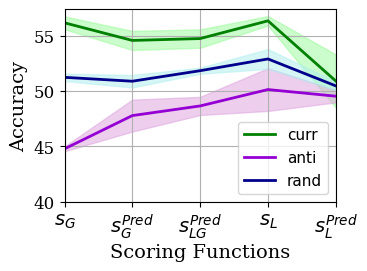

In [7]:
make_fig_line(table_av, table_sd, 
              'cifar10_iid_0.8a_0.2b_fedavg_scoring')